In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/pumping/osmotic/N1000/ell10'
#main_dir = '/Volumes/LaCie/chain_lumen/_data/pumping/osmotic/'

try :
    os.path.isdir(main_dir)
except :
    print('main_dir not found !')

In [2]:
eps = 1e-3
mu = 0.6105653703843762
theta = np.pi/3.
nu = theta / np.sin(theta)
print(nu, mu, np.sin(theta)**2/(2*theta-np.sin(2*theta)))

1.2091995761561452 0.6105653703843762 0.6105653703843762


In [3]:
Ltot = 12000
tauv, ell0, chiv, L0 = 1., 10., 50., 1.
xiv = chiv*ell0

In [4]:
ca_dict = {0.01 : ['ca1e-2', 'b'], 0.1 : ['ca1e-1', 'r'], 1 : ['ca1e0', 'purple'],10 : ['ca1e1', 'orange']}
#0 : ['ca0', 'k'], 

# (chis, chiv) : marker, markersize, alpha, linewidth
lw = 1.
ms = 4

chi_dict = {(5, 5) : ['^', ms, 1., lw],
            #(5, 1) : ['^', ms, 1., lw],
            (50, 5) : ['s', ms, 1., lw],
            #(50, 50) : ['+', ms, 1., lw],
            #(50, 1) : ['+', ms, 1., lw],
            #(500, 500) : ['s', ms, 1., lw],
            #(500, 1) : ['s', ms, 1., lw],
            (500, 5) : ['o', ms, 1., lw],
           }

nsim = 20


In [5]:
pathdict = {}

for chi in chi_dict.keys() :
    chiv, chis = chi
    print('chiv = ', chi[0], ' ; chis = ', chi[1])
    subdir = "chiv"+str(chi[0])+"_chis"+str(chi[1])
    pathdict[chi] = {}
        
    for ca in ca_dict.keys() :
        subsubdir = 'ca'+ca_dict[ca][0][2:]
        #try :
        if 1:
            pathdict[chi][ca] = an.make_path_dict(nsim, chiv, chis, main_dir, subdir, subsubdir)
            print(str(ca) + ' done !')
                
        #except :
        else :
            pass
            print(ca, ' skipped')
            

chiv =  5  ; chis =  5
0.01 done !
0.1 done !
1 done !
10 done !
chiv =  50  ; chis =  5
0.01 done !
0.1 done !
1 done !
10 done !
chiv =  500  ; chis =  5
0.01 done !
0.1 done !
1 done !
10 done !


In [6]:
Nt_N1000 = {}
Nt_avg, Nt_std = {}, {}

npts = 50

for chi in chi_dict.keys() :
    chiv, chis = chi
    print('===============================')
    print('chiv = ', chiv, ' ; chis = ', chis)
    
    Nt_N1000[chi] = {}
    Nt_avg[chi], Nt_std[chi] = {}, {}
    
    for ca in ca_dict.keys() :
        print('ca = ' + str(ca) + ' :')
        try :
        #if 1 :
            Nt_N1000[chi][ca] = an.import_osmotic(chiv, chis, pathdict, ca=ca)
            print('\tImported !')
            wmin = int(np.log10(np.min([Nt_N1000[chi][ca][i][1, 0] for i in range(nsim)])))
            wmax = int(np.log10(np.max([Nt_N1000[chi][ca][i][-1, 0] for i in range(nsim)])))+1
            Nt_avg[chi][ca], Nt_std[chi][ca] = an.batch(data_dict=Nt_N1000[(chiv, chis)][ca], wmin=wmin, wmax=wmax, nwindow=npts)
            print('\tAveraged !')
            print('')
            
        except :
            print('\tFailed...')
            print('')
            
print('===============================')
       


chiv =  5  ; chis =  5
ca = 0.01 :
	Failed...

ca = 0.1 :
	Failed...

ca = 1 :
	Imported !
End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

	Averaged !

ca = 10 :
	Failed...

chiv =  50  ; chis =  5
ca = 0.01 :
	Imported !
End of import !
	Averaged !

ca = 0.1 :
	Imported !
End of import !
	Averaged !

ca = 1 :
	Imported !
End of import !
	Averaged !

ca = 10 :
	Imported !
End of import !
	Averaged !

chiv =  500  ; chis =  5
ca = 0.01 :
	Failed...

ca = 0.1 :
	Failed...

ca = 1 :
	Imported !
End of import !
	Averaged !

ca = 10 :
	Failed...



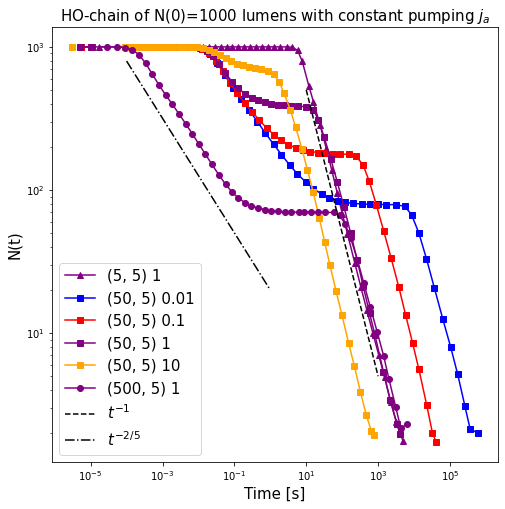

In [7]:

plt.figure(figsize=(8, 8))

plt.xscale('log')
plt.yscale('log')

rescaled = False

for chi in chi_dict.keys() :
    for ca in ca_dict.keys() :
        try :
            plt.plot(Nt_avg[chi][ca][:, 0], Nt_avg[chi][ca][:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0], label = str(chi)+' ' +str(ca))
        except : pass

if rescaled :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(2, 3, 101)
    t2 = np.logspace(-4, 0, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(-4, 0, 101)

plt.plot(t1, kappa1*t1**alpha1, color='k', linestyle='--', label = r'$t^{-1}$')
plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')

if rescaled :
    plt.xlabel('t/T', fontsize=15)
else :
    plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)
plt.title(r'HO-chain of N(0)=1000 lumens with constant pumping $j_a$', fontsize=15)
plt.legend(fontsize=15, loc=3)
#plt.savefig('coarsening_pumping_chis500_chiv500.png', format='png')
plt.show()


In [16]:
# 

In [27]:
tauv, ell0, chiv, L0 = 1., 10., 50., 1.
xiv = chiv*ell0
Ltot = 1000 * (ell0+2*L0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


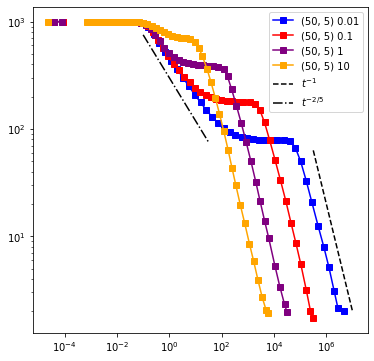

In [159]:
plt.figure(figsize=(6, 6))
plt.xscale('log')
plt.yscale('log')

rescaled = True

for chi in [(50, 5)] :
    T = (2*tauv*ell0*L0)/((xiv**2)*mu*eps)
    for ca in ca_dict.keys() :
        try :
            if rescaled :
                plt.plot(Nt_avg[chi][ca][:, 0]/T, Nt_avg[chi][ca][:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0], label = str(chi)+' ' +str(ca))
            else :
                plt.plot(Nt_avg[chi][ca][:, 0], Nt_avg[chi][ca][:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0], label = str(chi)+' ' +str(ca))
        except : pass

if rescaled :
    kappa1, alpha1 = 20000000., -1
    kappa2, alpha2 = 300., -2./5
    t1 = np.logspace(5.5, 7, 101)
    t2 = np.logspace(-1, 1.5, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(0, 2, 101)

plt.plot(t1, kappa1*t1**alpha1, color='k', linestyle='--', label = r'$t^{-1}$')
plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')
plt.legend()
plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/pumping_chiv_bis.eps', format='eps')

plt.show()

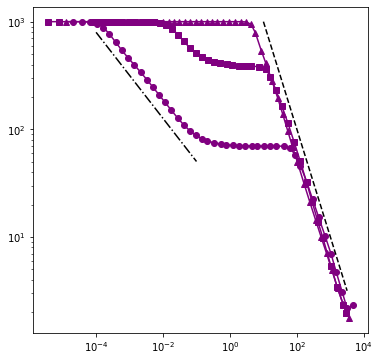

In [43]:
plt.figure(figsize=(6, 6))
plt.xscale('log')
plt.yscale('log')

rescaled = True

for chi in [(5, 5), (50, 5), (500, 5)] :
    Tp = tauv / (mu*nu*ca)
    for ca in [1] :
        try :
            if rescaled :
                plt.plot(Nt_avg[chi][ca][:, 0]/Tp, Nt_avg[chi][ca][:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0], label = str(chi)+' ' +str(ca))
            else :
                plt.plot(Nt_avg[chi][ca][:, 0], Nt_avg[chi][ca][:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0], label = str(chi)+' ' +str(ca))
        except : pass

if rescaled :
    kappa1, alpha1 = 10000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1., 3.5, 101)
    t2 = np.logspace(-4, -1, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(-4, 0, 101)

plt.plot(t1, kappa1*t1**alpha1, color='k', linestyle='--', label = r'$t^{-1}$')
plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')

#plt.grid()
plt.savefig('/Users/mathieuleverge/Desktop/pumping_chiv.eps', format='eps')
plt.show()


# Distribution

In [9]:
def find_tstep(time_list, t0) :
    return np.argmin(np.abs(time_list - t0))

def calc_avg_distrib(X_dict, Y_dict) :
    X_array = np.array([X_dict[k] for k in X_dict.keys()])
    X_avg = np.average(X_array, axis=0)

    Y_array = np.array([Y_dict[k] for k in Y_dict.keys()])
    Y_avg = np.average(Y_array, axis=0)
    return X_avg, Y_avg

def make_T_dict(folder, npts, nsim=20, log_tmin=-3, log_tmax=7) :
    time_plot_list = np.logspace(log_tmin, log_tmax, npts)
    T_dict = {}
    #for k in [30] :
    for k in range(nsim) :
        k+=20
        T_dict[k] = np.loadtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), usecols=0)
    return T_dict, time_plot_list

def make_step_dict(T_dict, time_plot_list, npts, nsim) :
    step_dict = {}
    for n in range(npts) :
        step_dict[n] = {}
        for k in range(nsim) :
        #for k in [30] :
            k+=20
            step_dict[n][k] = np.argmin(np.abs(T_dict[k] - time_plot_list[n]))
    return step_dict

def calc_distrib(time, folder, area = False) :
    global mu
    dat = {}
    for elem in os.listdir(folder) :
        if elem.startswith('run') :
            #print(elem, ' imported', end='\r')
            #if int(elem[-4:]) >= 100 and int(elem[-4:]) <= 199 :
            if 1 :
                tdat = np.loadtxt(os.path.join(folder, elem, 'distrib_length.dat'), usecols=0)
                step = np.argmin(np.abs(tdat-time))
                Ldat = np.genfromtxt(os.path.join(folder, elem, 'distrib_length.dat'), skip_header=step, skip_footer=len(tdat)-step-1)
                dat[int(elem[-4:])] = [step, Ldat]
    
    new_L = np.concatenate([dat[k][1][1:] for k in dat.keys()])
    bins = np.max([10, 10+int(np.log10(len(new_L)))*7])
    
    if area :
        new_A = new_L**2 / mu
        y, x = np.histogram(new_A, bins=bins, weights=np.ones_like(new_A)/len(new_A))
    else :
        y, x = np.histogram(new_L, bins=bins, weights=np.ones_like(new_L)/len(new_L))
    x = 0.5*(x[1:]+x[:-1])
    distrib = [x, y]
    return distrib


In [20]:
NT_p = {}
chis, chiv = 5, 50
#chis, chiv = 5, 500
#for ca in ['1e-2', '1e-1', '1e0', '1e1'] :
calist = ['1e1']
for ca in calist :
    print('ca : ', ca, ' running...', end='\n')
    NT_p[ca] = {}
    if ca != 10 :
        for n in range(0, 20) :
            filename = os.path.join(main_dir, 'chiv'+str(chiv)+'_chis'+str(chis), 'ca'+ca, 'run'+str(n).zfill(4), 'sim_nlum.dat')
            #filename = os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10', 'chiv'+str(chiv)+'_chis'+str(chis), 'run'+str(n).zfill(4), 'sim_nlum.dat')
            NT_p[ca][n] = np.loadtxt(filename)
            print(n, end='\r')
    else :
        for n in range(40) :
            NT_p[ca][n] = np.loadtxt(filename)
    print('ca : ', ca, ' done', end='\n')
    

ca :  1e1  running...
ca :  1e1  done


End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

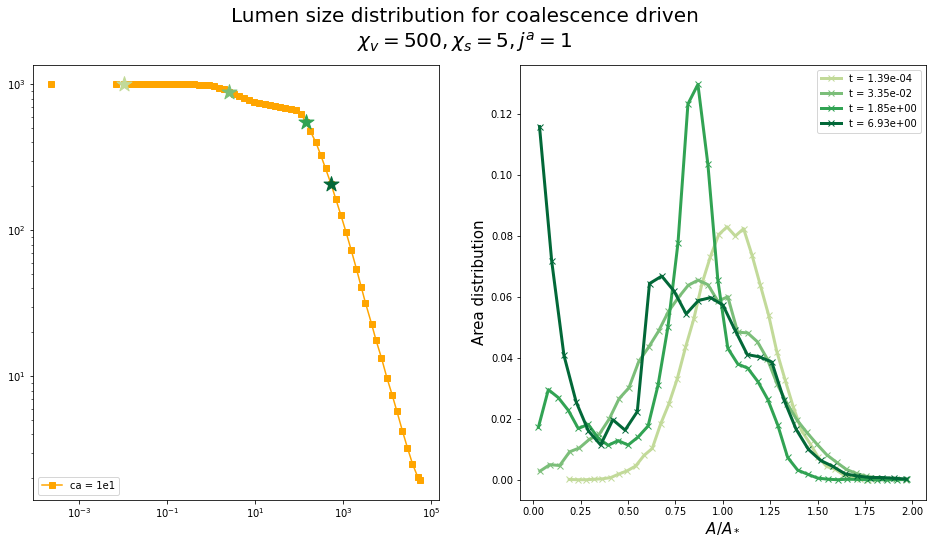

In [25]:
wmin_dict = {'1e-2' : -5, '1e-1' : -5, '1e0' : -5, '1e1' : -5}
wmax_dict = {'1e-2' : 6, '1e-1' : 5, '1e0' : 4, '1e1' : 3}
npts = 70

#steps = [10, 20, 27, 30]
steps = [5, 25, 40, 45]#70, 77]
col_steps = {steps[0] : '#C2DA99', 
             steps[1] : '#7BBE79', 
             steps[2] : '#31A353', 
             steps[3] : '#026838', 
             #steps[4] : '#F27FBE',
            }

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].set_xscale('log')
ax[0].set_yscale('log')

ca='1e1'
folder = os.path.join(main_dir, 'chiv'+str(chiv)+'_chis'+str(chis), 'ca'+ca)
show_sim = False

area = True#False

#for ca in ['1e-2', '1e-1', '1e0', '1e1'] :
for ca in ['1e1'] :
    wmin, wmax = wmin_dict[ca], wmax_dict[ca]
    T = (2*tauv*L0**2)/((xiv**2)*mu*eps)
    #T=1
    index_array = an.gen_index_array(NT_p[ca][0], npts)
    res_avg, res_std = an.batch(data_dict=NT_p[ca], wmin=wmin, wmax=wmax, nwindow=npts)
    #print(res_avg)
    ax[0].plot(res_avg[:, 0]/T, res_avg[:, 1], marker='s', color = ca_dict[float(ca)][1], label = 'ca = '+str(ca))

    for s in steps :
        ax[0].scatter(res_avg[s, 0]/T, res_avg[s, 1], color=col_steps[s], zorder=10, marker='*', s=250)
        if area :
            if os.path.isfile('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'area.txt') :
                distrib = np.loadtxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'area.txt')
            else :
                distrib = calc_distrib(time = res_avg[s, 0], folder=folder, area=area)
                np.savetxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'area.txt', distrib)
            
        else :
            if os.path.isfile('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt') :
                distrib = np.loadtxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt')
            else :
                distrib = calc_distrib(time = res_avg[s, 0], folder=folder, area=area)
                np.savetxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt', distrib)
                
        ax[1].plot(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), marker='x', color=col_steps[s], linewidth=3)
        #ax[1].(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), marker='x', color=col_steps[s])
            
        if show_sim :
            for k in NT_p[ca].keys() :
                ax[0].plot(NT_p[ca][k][:, 0]/T, NT_p[ca][k][:, 1], color=ca_dict[float(ca)][1], alpha=0.1)
            
    np.savetxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'.txt', res_avg)
    

ax[1].legend()
ax[0].legend(loc=3)

if area :
    ax[1].set_ylabel('Area distribution', fontsize=15)
    ax[1].set_xlabel(r'$A / A_*$', fontsize=15)
else :
    ax[1].set_ylabel('Length distribution', fontsize=15)
    ax[1].set_xlabel(r'$L / L_*$', fontsize=15)
    
#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/pumping_distributions.eps', format='eps')
plt.suptitle('Lumen size distribution for coalescence driven\n'+r'$\chi_v = 500, \chi_s=5, j^a=1$', fontsize=20)
plt.show()



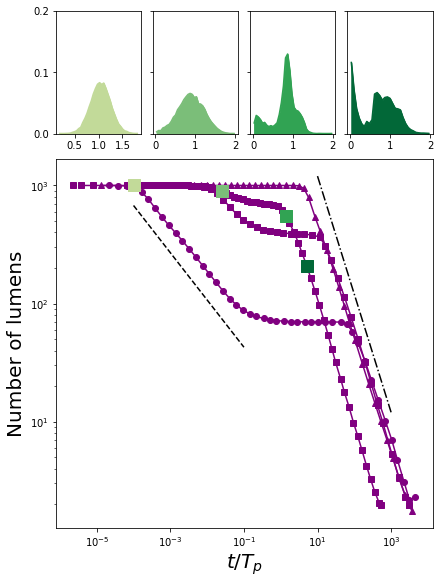

In [27]:
from matplotlib.gridspec import GridSpec


fig = plt.figure(constrained_layout=True, figsize=(6, 8))
#fig = plt.figure(figsize=(8, 6))
#fig.tight_layout(pad=100.0)

gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[1:, :])
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax3.set_yticklabels([])
ax4 = fig.add_subplot(gs[0, 2])
ax4.set_yticklabels([])
ax5 = fig.add_subplot(gs[0, 3])
ax5.set_yticklabels([])
ax_steps = [ax2, ax3, ax4, ax5]

#fig.suptitle("GridSpec")
#format_axes(fig)
#Tv = tauv*L0/(mu*eps*ell0*chiv**2)
tau = 1
T = (2*tau*L0**2)/((xiv**2)*mu*eps)

ax1.set_xscale('log')
ax1.set_yscale('log')

rescaled = True

ca = 1e0
Tp = tauv / (mu*nu*ca)
for chi in [(5, 5), (50, 5), (500, 5)] :
    for ca in [1] :
        if rescaled :
            ax1.plot(Nt_avg[chi][ca][:, 0]/Tp, Nt_avg[chi][ca][:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0])#, label = str(chi)+' ' +str(ca))
        else :
            ax1.plot(Nt_avg[chi][ca][:, 0], Nt_avg[chi][ca][:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0], label = str(chi)+' ' +str(ca))
        
        
ax1.plot(res_avg[:, 0]/Tp, res_avg[:, 1], marker='s', color = ca_dict[float(ca)][1], label = 'ca = '+str(ca))
a1, k1, t1 = -2/5., 17., np.logspace(-4, -1., 101)
a2, k2, t2 = -1., 12000., np.logspace(1, 3., 101)
ax1.plot(t1, k1*t1**a1, color='k', linestyle='--')
ax1.plot(t2, k2*t2**a2, color='k', linestyle='-.')
ax1.set_xlabel(r'$t/T_p$', fontsize=20)
ax1.set_ylabel(r'Number of lumens', fontsize=20)
#ax1.grid()

i=0
chiv, chis = 50, 5
ca = '1e1'
for s in steps :
    ax1.scatter(res_avg[s, 0]/Tp, res_avg[s, 1], color=col_steps[s], zorder=10, marker='s', s=150)
    if area :
        distrib = np.loadtxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'area.txt')
    else :
        distrib = np.loadtxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt')
    ax_steps[i].plot(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), color=col_steps[s])
    ax_steps[i].fill_between(distrib[0]/np.average(distrib[0]), 0., distrib[1], color=col_steps[s])
    #ax_steps[i].plot(distrib[0], distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), color=col_steps[s])
    #ax_steps[i].fill_between(distrib[0], 0., distrib[1], color=col_steps[s])
    #ax_steps[i].set_xlim(0., 2.05)
    ax_steps[i].set_ylim(0., 0.2)
    i += 1
    
ax2.locator_params(tight=True, nbins=3)
ax3.locator_params(tight=True, nbins=3)
ax4.locator_params(tight=True, nbins=3)
ax5.locator_params(tight=True, nbins=3)
    
#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/pumping_distributions_area.eps')
plt.show()


In [ ]:
wmin_dict = {'1e-2' : -5, '1e-1' : -5, '1e0' : -5, '1e1' : -5}
wmax_dict = {'1e-2' : 6, '1e-1' : 5, '1e0' : 4, '1e1' : 3}
npts = 100

#steps = [10, 20, 27, 30]
steps = [10, 55, 70, 77]
col_steps = {steps[0] : '#C2DA99', 
             steps[1] : '#7BBE79', 
             steps[2] : '#31A353', 
             steps[3] : '#026838', 
             #steps[4] : '#F27FBE',
            }

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].set_xscale('log')
ax[0].set_yscale('log')


folder = os.path.join(main_dir, 'N1000', 'chiv'+str(chiv)+'_chis'+str(chis), 'ca'+ca)
show_sim = False

area = True

#for ca in ['1e-2', '1e-1', '1e0', '1e1'] :
for chi in calist :
    wmin, wmax = wmin_dict[ca], wmax_dict[ca]
    #T = (2*tauv*L0**2)/((xiv**2)*mu*eps)
    #T=1
    index_array = gen_index_array(NT_p[ca][100], npts)
    res_avg, res_std = an.batch(data_dict=NT_p[ca], wmin=wmin, wmax=wmax, nwindow=npts)
    #print(res_avg)w
    ax[0].plot(res_avg[:, 0]/T, res_avg[:, 1], marker='s', color = ca_dict[float(ca)][1], label = 'ca = '+str(ca))

    for s in steps :
        ax[0].scatter(res_avg[s, 0]/T, res_avg[s, 1], color=col_steps[s], zorder=10, marker='*', s=250)
        if os.path.isfile('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt') :
            distrib = np.loadtxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt')
        else :
            #print('Calculating distribution at step ', s, end='\r')
            distrib = calc_distrib(time = res_avg[s, 0], folder=folder, area=area)
            np.savetxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt', distrib)
        ax[1].plot(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), marker='x', color=col_steps[s], linewidth=3)
        #ax[1].(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), marker='x', color=col_steps[s])
            
        if show_sim :
            for k in NT_p[ca].keys() :
                ax[w0].plot(NT_p[ca][k][:, 0]/T, NT_p[ca][k][:, 1], color=ca_dict[float(ca)][1], alpha=0.1)
            
    np.savetxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'.txt', res_avg)
    

ax[1].legend()
ax[0].legend(loc=3)

if area :
    ax[1].set_ylabel('Area distribution', fontsize=15)
    ax[1].set_xlabel(r'$A / A_*$', fontsize=15)
else :
    ax[1].set_ylabel('Length distribution', fontsize=15)
    ax[1].set_xlabel(r'$L / L_*$', fontsize=15)
    
#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/pumping_distributions.eps', format='eps')
plt.suptitle('Lumen size distribution for coalescence driven\n'+r'$\chi_v = 50, \chi_s=1, j^a=1$', fontsize=20)
plt.show()




In [212]:
ell_avg1 = np.genfromtxt(os.path.join(main_dir, 'chiv500_chis5/ca1e0/run0000/sim_ell_avg.dat'))


In [240]:
L0=1.
chiv, ell0 = 500., 10.
xiv = chiv*ell0
ca = 1.0

xiv_bar = xiv/np.sqrt(ell0*L0)

Tp = tauv / (mu*nu*ca)


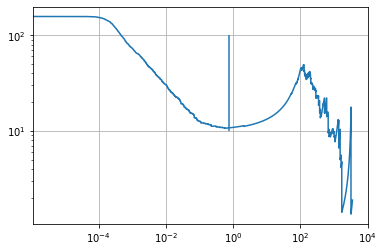

In [242]:
plt.xscale('log')
plt.yscale('log')
plt.plot(ell_avg1[:-100, 0], xiv_bar/ell_avg1[:-100, 1])
#plt.plot(ell_avg1[:-100, 0], ell_avg1[:-100, 1])

plt.vlines(x=1./Tp, ymin=10, ymax=100)
plt.grid()